In [3]:
x <- seq(5,54)
e <- x*rnorm(length(x), 0, 1)
y <- 10+2*x+e

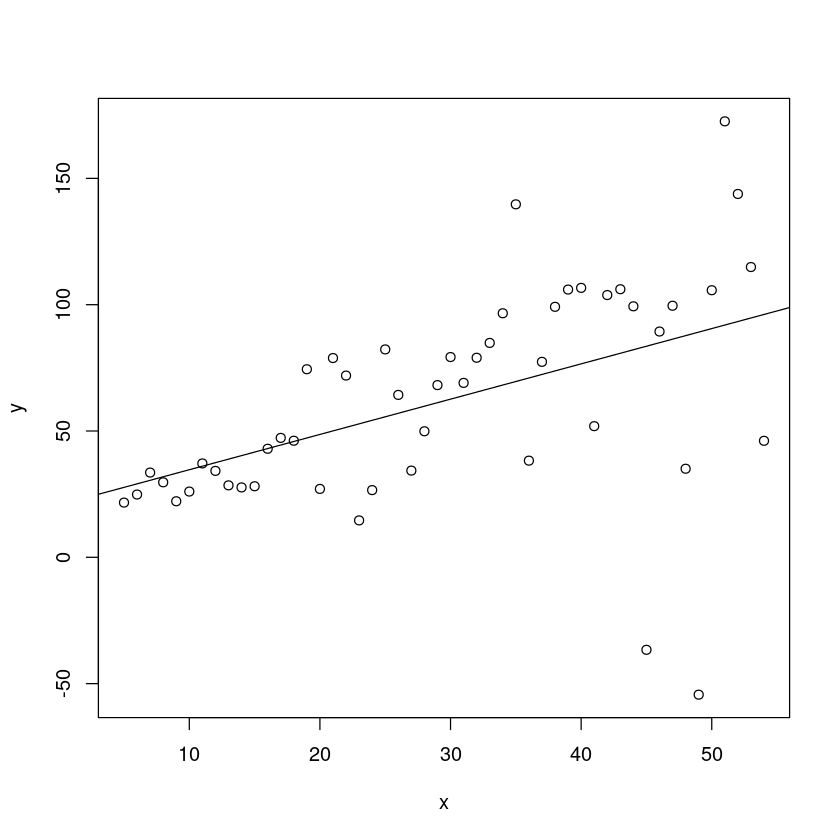

In [4]:
plot(x,y)
abline(lm(y~x))

In [5]:
m1 <- lm(y~x)
summary(m1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-143.535  -10.917    3.736   20.417   80.633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.7071    12.2432   1.691  0.09726 .  
x             1.3969     0.3728   3.747  0.00048 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.04 on 48 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2102 
F-statistic: 14.04 on 1 and 48 DF,  p-value: 0.0004802


In [6]:
m2 <- lm(y~x, weights=1/x)
summary(m2)


Call:
lm(formula = y ~ x, weights = 1/x)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-20.9061  -2.5907   0.9924   3.3838  11.7200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.4589     6.6675   2.469   0.0172 *  
x             1.5409     0.2741   5.623 9.41e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.953 on 48 degrees of freedom
Multiple R-squared:  0.3971,	Adjusted R-squared:  0.3845 
F-statistic: 31.61 on 1 and 48 DF,  p-value: 9.405e-07


In [7]:
library('sandwich')

In [8]:
m1 <- lm(y~x)
s1 <- summary(lm(y~x))

In [9]:
s1$coefficients

Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) 20.707069 12.2432074 1.691311 0.0972613041
x            1.396932  0.3728079 3.747056 0.0004801506

In [10]:
vcovHC(m1, type='HC0')
vcovHC(m1, type='HC1')
vcovHC(m1, type='HC2')
vcovHC(m1, type='HC3')

(Intercept) x        
(Intercept) 74.288641   -3.479863
x           -3.479863    0.182487

(Intercept) x         
(Intercept) 77.384001   -3.6248578
x           -3.624858    0.1900907

(Intercept) x         
(Intercept) 78.56921    -3.6895795
x           -3.68958     0.1933823

(Intercept) x         
(Intercept) 83.115995   -3.9125359
x           -3.912536    0.2049584

In [12]:
library('lmtest')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [17]:
coeftest(m1)


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 20.70707   12.24321  1.6913 0.0972613 .  
x            1.39693    0.37281  3.7471 0.0004802 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [18]:
coeftest(m1, vcov. = vcovHC(m1, type='HC0'))


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 20.70707    8.61909  2.4025 0.020201 * 
x            1.39693    0.42719  3.2701 0.001993 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [11]:
sqrt(vcovHC(m1, type='HC0')) # white
sqrt(vcovHC(m1, type='HC1'))
sqrt(vcovHC(m1, type='HC2'))
sqrt(vcovHC(m1, type='HC3'))
sqrt(vcovHC(m1, type='HC4'))

Warning message in sqrt(vcovHC(m1, type = "HC0")):
“NaNs produced”


(Intercept) x       
(Intercept) 8.619086         NaN
x                NaN    0.427185

Warning message in sqrt(vcovHC(m1, type = "HC1")):
“NaNs produced”


(Intercept) x        
(Intercept) 8.796818          NaN
x                NaN    0.4359939

Warning message in sqrt(vcovHC(m1, type = "HC2")):
“NaNs produced”


(Intercept) x        
(Intercept) 8.863928          NaN
x                NaN    0.4397525

Warning message in sqrt(vcovHC(m1, type = "HC3")):
“NaNs produced”


(Intercept) x        
(Intercept) 9.116797          NaN
x                NaN    0.4527233

Warning message in sqrt(vcovHC(m1, type = "HC4")):
“NaNs produced”


(Intercept) x        
(Intercept) 8.980775          NaN
x                NaN    0.4458286

In [13]:
s1$coefficients

Estimate Std. Error t value   Pr(>|t|)    
(Intercept) 6.515304 9.2568195  0.7038383 4.849341e-01
x           2.066560 0.2818719  7.3315600 2.285410e-09

In [23]:
x <- seq(5,100)

bh1 <- bh2 <- se1 <- se2 <- se3 <- c() 

for (i in 1:1000){
    e <- x*rnorm(length(x), 0, 1)
    y <- 10+2*x+e

    m1 <- summary(lm(y~x))
    m2 <- summary(lm(y~x, weights=1/x))
    
    bh1 <- c(bh1, m1$coefficients[2,1]) 
    bh2 <- c(bh2, m2$coefficients[2,1]) 
    se1 <- c(se1, m1$coefficients[2,2]) 
    se2 <- c(se2, m2$coefficients[2,2]) 
    se3 <- c(se3, sqrt(vcovHC(lm(y~x), type='HC0')[2,2]))
    
}



In [25]:
mean(bh1)
mean(bh2)

[1] 1.988556

[1] 1.991508

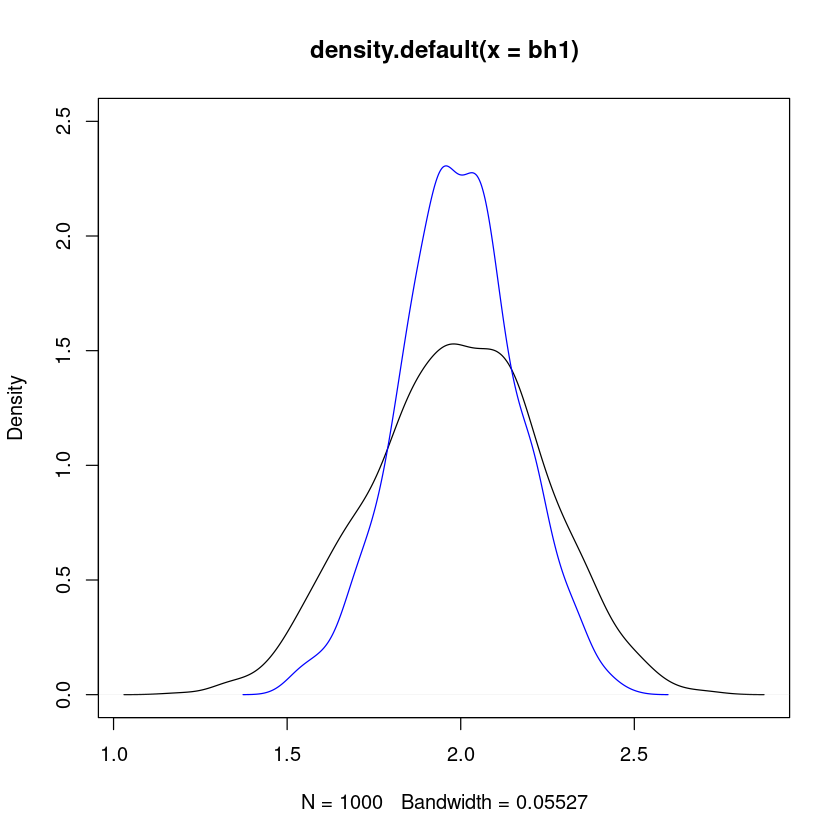

In [26]:
plot(density(bh1), ylim=c(0,2.5))
lines(density(bh2), col='blue')

In [27]:
sd(bh1)

[1] 0.2444981

In [28]:
sd(bh2)

[1] 0.1698246

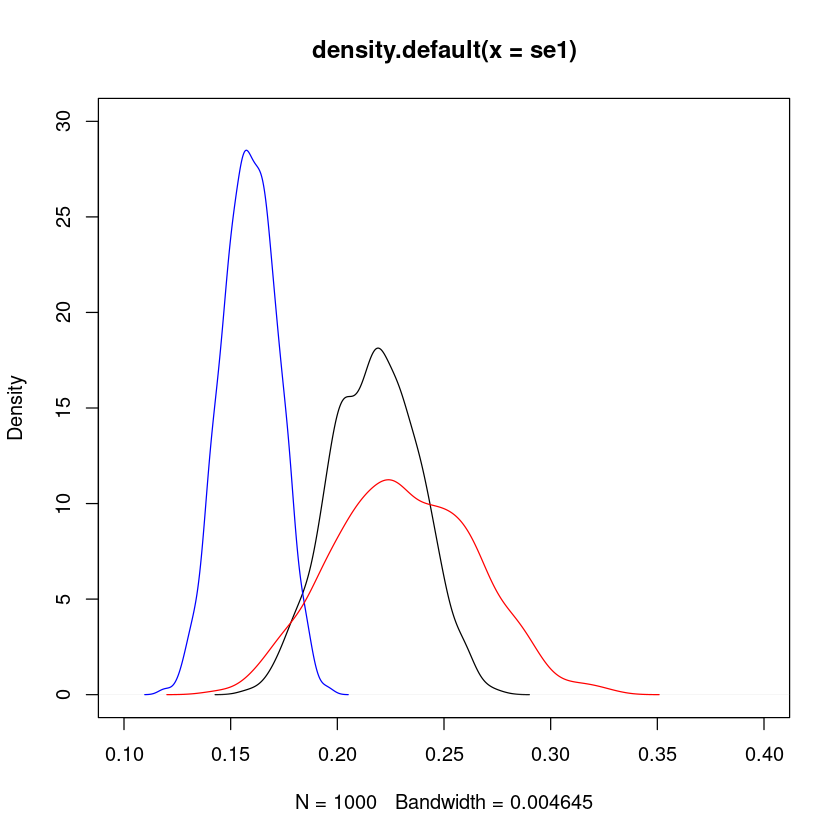

In [29]:
plot(density(se1), xlim=c(0.1,0.4), ylim=c(0,30))
lines(density(se2), col='blue')
lines(density(se3), col='red')